## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 

(50000, 32, 32, 3)


In [3]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

In [4]:

classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))


#卷積組合
classifier.add(Convolution2D(64, (3,3), input_shape=x_train.shape[1:]))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))

'''自己決定MaxPooling2D放在哪裡'''
#classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(256)) #output_dim=100,activation=relu

#輸出
classifier.add(Dense(output_dim=10,activation='softmax'))

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train,batch_size=100,epochs=20)

/Users/ken/opt/anaconda3/envs/ai_base/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


Epoch 1/20
50000/50000 [==============================] - 121s 2ms/step - loss: 5.3011 - accuracy: 0.3636
Epoch 2/20
50000/50000 [==============================] - 122s 2ms/step - loss: 1.6475 - accuracy: 0.5032
Epoch 3/20
50000/50000 [==============================] - 121s 2ms/step - loss: 1.2257 - accuracy: 0.5833
Epoch 4/20
50000/50000 [==============================] - 120s 2ms/step - loss: 1.0467 - accuracy: 0.6380
Epoch 5/20
50000/50000 [==============================] - 121s 2ms/step - loss: 0.9237 - accuracy: 0.6794
Epoch 6/20
50000/50000 [==============================] - 119s 2ms/step - loss: 0.8345 - accuracy: 0.7098
Epoch 7/20
50000/50000 [==============================] - 116s 2ms/step - loss: 0.7673 - accuracy: 0.7333
Epoch 8/20
50000/50000 [==============================] - 113s 2ms/step - loss: 0.7064 - accuracy: 0.7534
Epoch 9/20
50000/50000 [==============================] - 113s 2ms/step - loss: 0.6590 - accuracy: 0.7687
Epoch 10/20
50000/50000 [=====================

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [20]:
# input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
# classifier.predict(input_example)

In [21]:
# print(x_test.shape)
y_predict = classifier.predict(x_test[:10])
# print(y_predict.shape)
# print(y_predict)

In [22]:
for predict_rlt in y_predict:
    print(np.where(predict_rlt == np.max(predict_rlt)))

    # 0 : airplain
# 1 : automobile
# 2 : bird
# 3 : cat
# 4 : deer
# 5 : dog
# 6 : frog
# 7 : horse
# 8 : ship
# 9 : truck

(array([3]),)
(array([8]),)
(array([8]),)
(array([0]),)
(array([6]),)
(array([6]),)
(array([1]),)
(array([4]),)
(array([3]),)
(array([1]),)


/Users/ken/opt/anaconda3/envs/ai_base/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


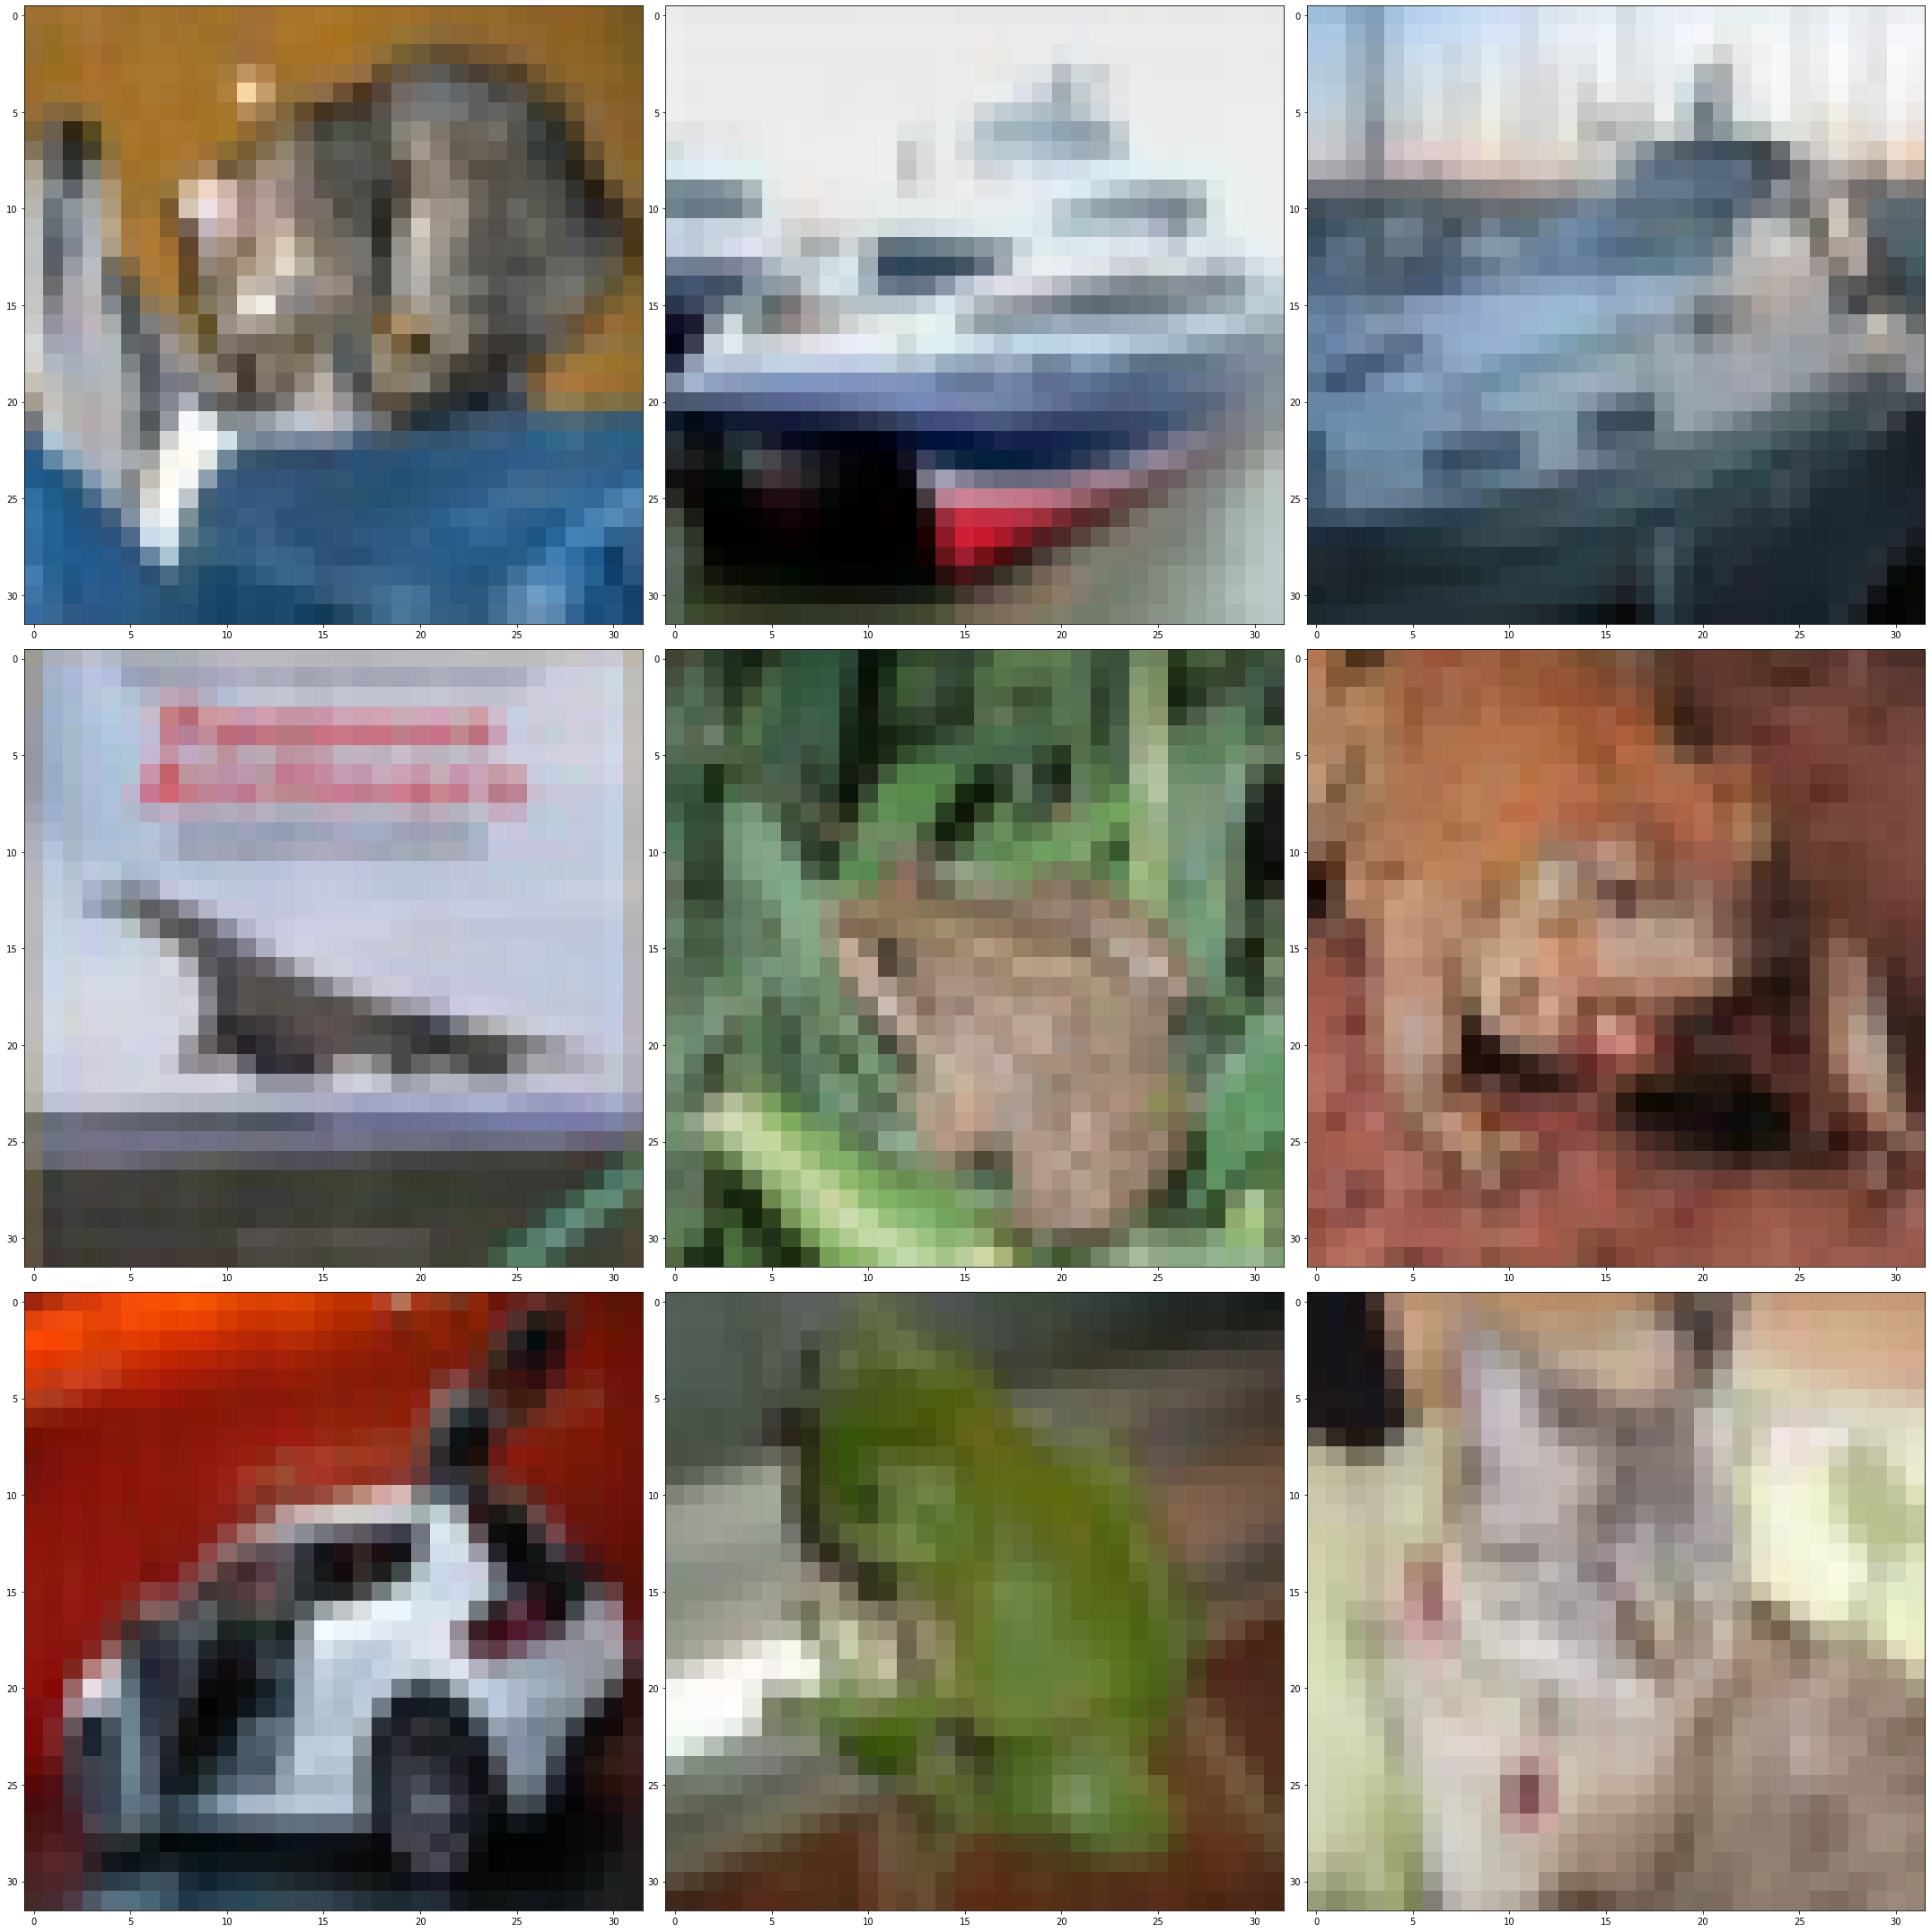

In [44]:
import matplotlib.pyplot as plt
(x_train_1, y_train_1), (x_test_1, y_test_1) = cifar10.load_data()

max_num_of_row = 3
num_of_show = 9
num_row = num_of_show // max_num_of_row
if (num_of_show % max_num_of_row) != 0:
    num_row += 1

fig = plt.figure(figsize=(max_num_of_row*10, max_num_of_row*10))
for idx in range(num_of_show):
    for row in range(1, max_num_of_row+1):
        prefix_idx = int(str(max_num_of_row) + str(num_row) + str(idx+1))
        tmp_ax = fig.add_subplot(prefix_idx)
        tmp_ax.imshow(x_test_1[idx]) 
        pass
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/ken/opt/anaconda3/envs/ai_base/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clippi

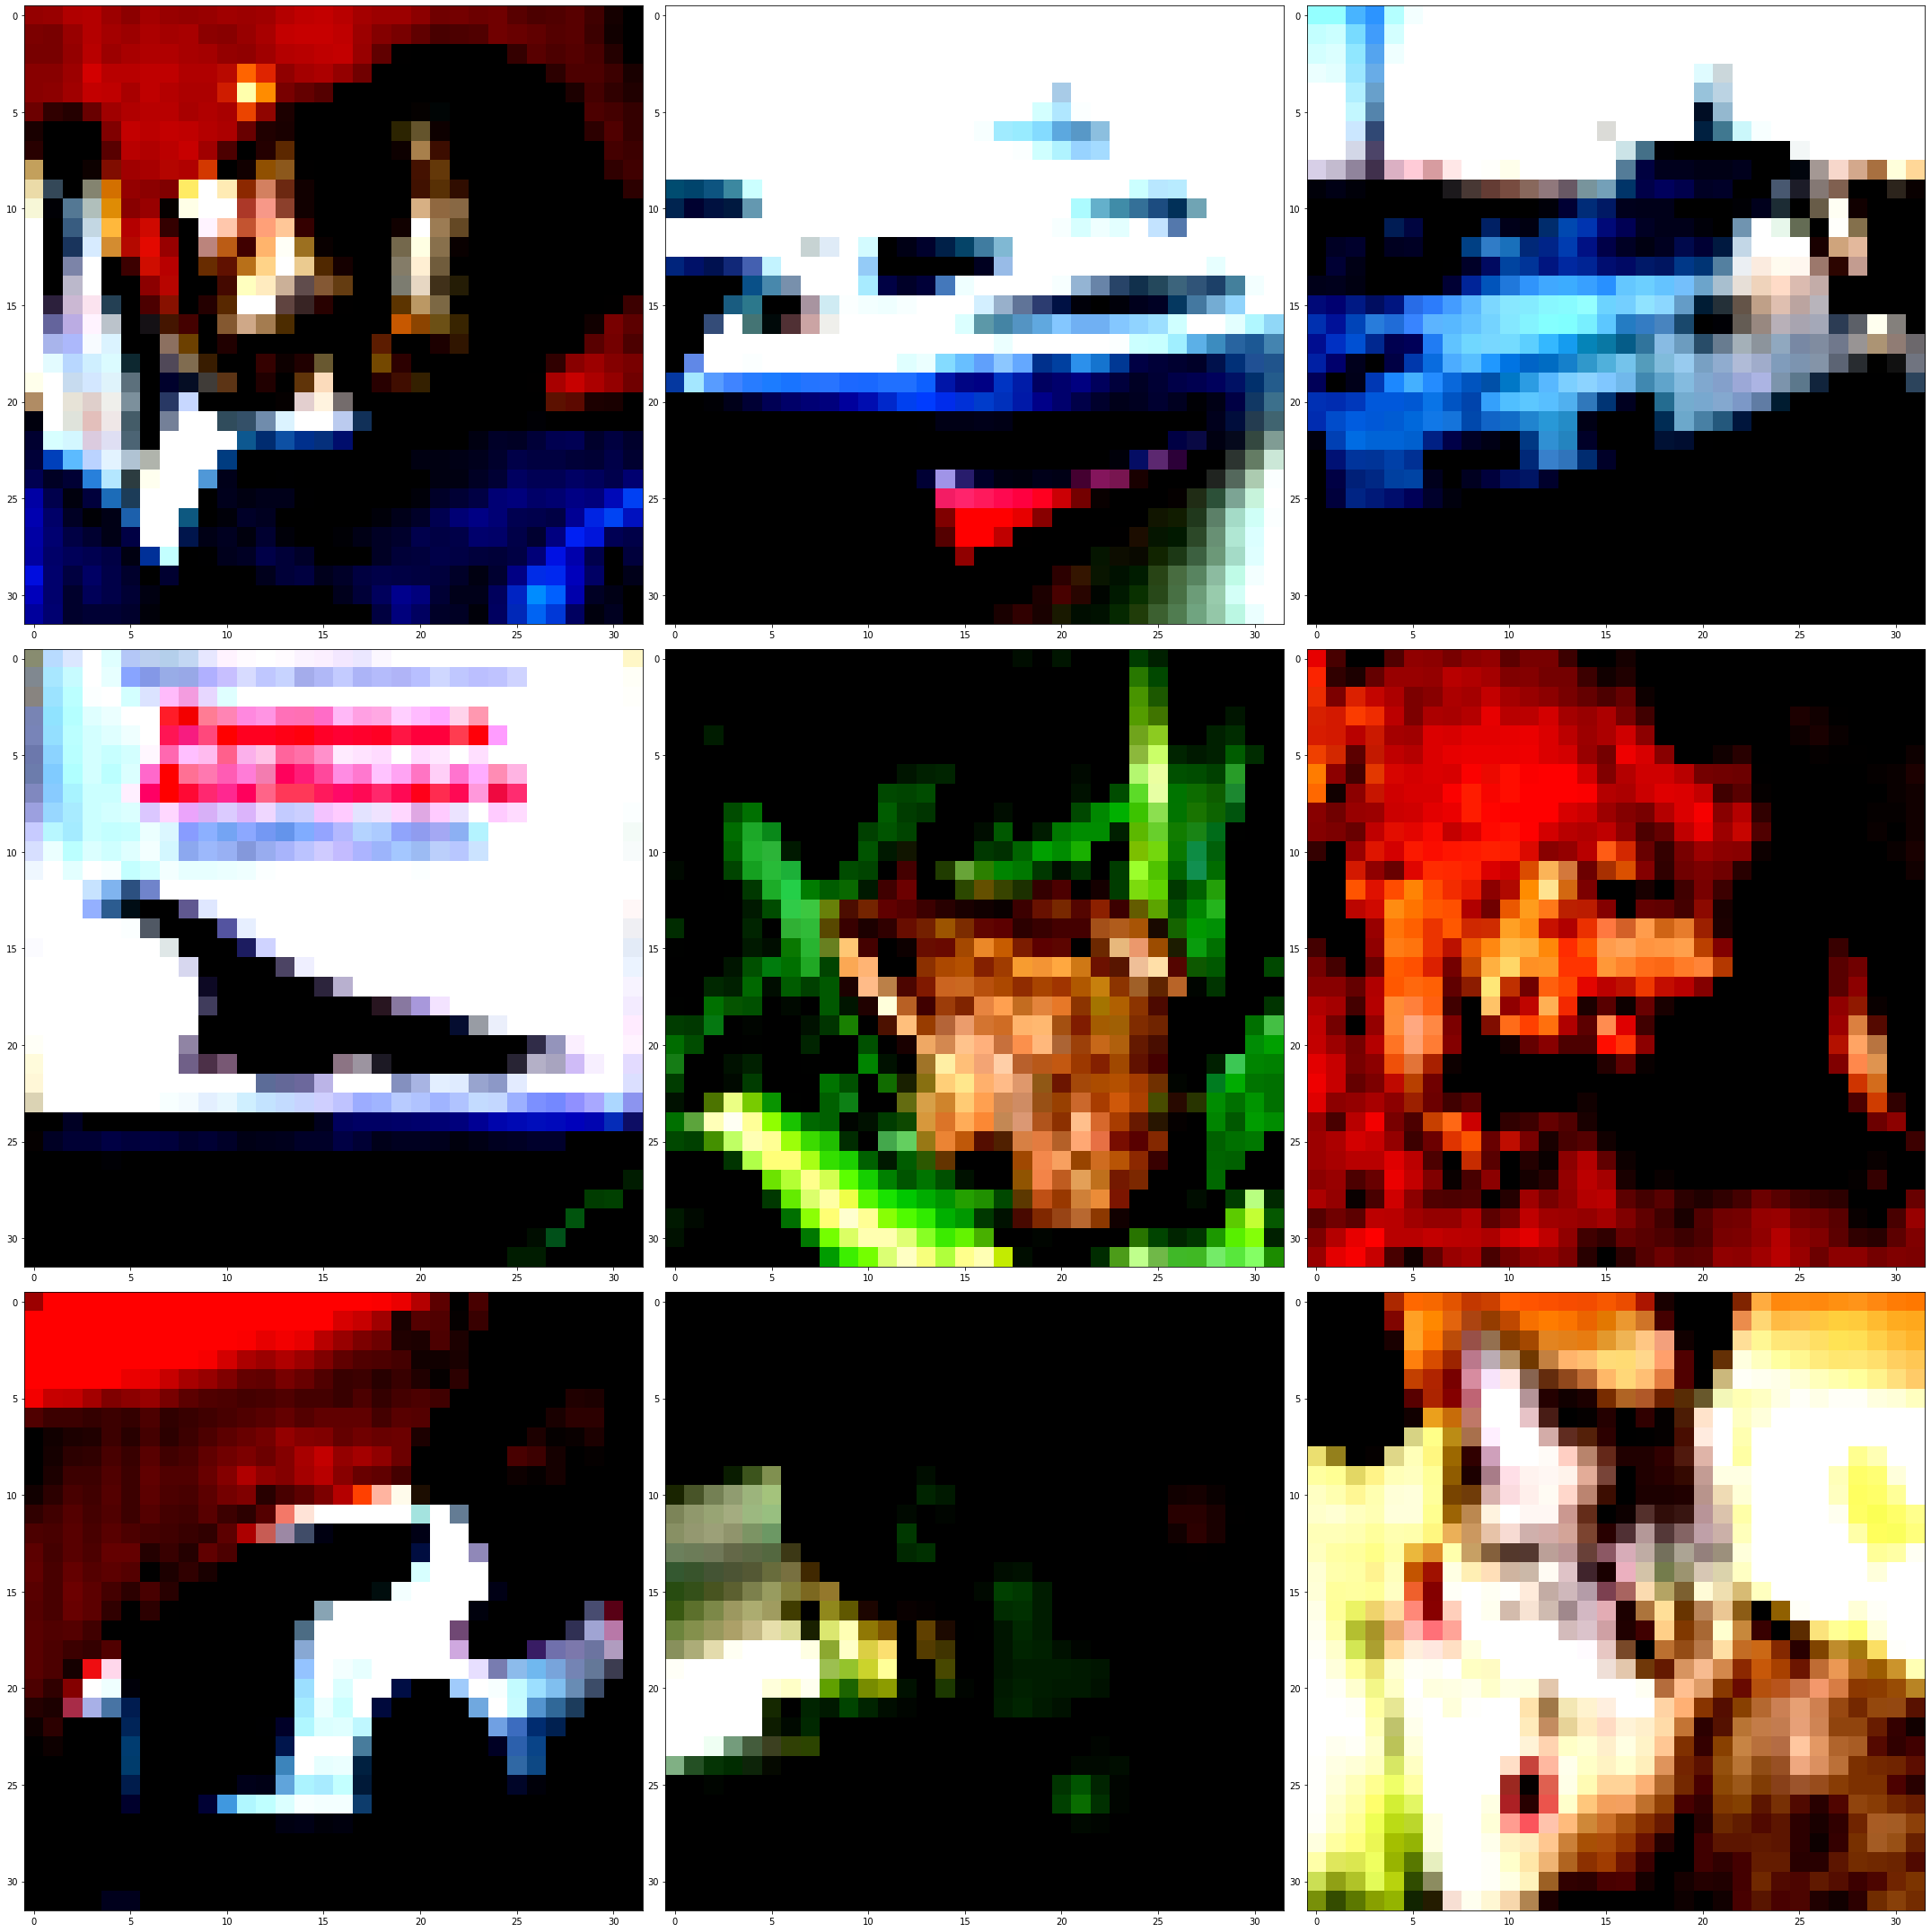

In [43]:
import matplotlib.pyplot as plt
max_num_of_row = 3
num_of_show = 9
num_row = num_of_show // max_num_of_row
if (num_of_show % max_num_of_row) != 0:
    num_row += 1

fig = plt.figure(figsize=(max_num_of_row*10, max_num_of_row*10))
for idx in range(num_of_show):
    for row in range(1, max_num_of_row+1):
        prefix_idx = int(str(max_num_of_row) + str(num_row) + str(idx+1))
        tmp_ax = fig.add_subplot(prefix_idx)
        tmp_ax.imshow(x_test[idx]) 
        pass
plt.tight_layout()
